In [1]:
import datetime
import os
from itertools import repeat

import keras.metrics
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint, TerminateOnNaN
from keras.losses import MeanSquaredError, Loss, mean_squared_error
from keras.preprocessing.image import ImageDataGenerator, random_rotation, random_brightness, random_zoom

import tensorflow as tf
import keras.backend as K
import numpy as np

from utils.pix2pix import *
from IPython import display


In [3]:
X_train = np.load("data/2000_0-1_travel_data_32.npy")
y_train = np.load("data/2000_0-1_travel_label_32.npy")

X_train = (X_train - X_train.min()) / (X_train.max() - X_train.min())
# 实例化模型
generator = create_conv_autoencoder_with_skip_connections()
discriminator = Discriminator()

generator_optimizer = tf.keras.optimizers.Adam(2e-4, beta_1=0.5)
discriminator_optimizer = tf.keras.optimizers.Adam(2e-4, beta_1=0.5)

checkpoint_dir = './training_checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")
checkpoint = tf.train.Checkpoint(generator_optimizer=generator_optimizer,
                                 discriminator_optimizer=discriminator_optimizer,
                                 generator=generator,
                                 discriminator=discriminator)

log_dir = "logs/"

In [4]:
# Restoring the latest checkpoint in checkpoint_dir
checkpoint.restore(tf.train.latest_checkpoint(checkpoint_dir))

In [7]:
BUFFER_SIZE = 400
# The batch size of 1 produced better results for the U-Net in the original pix2pix experiment
BATCH_SIZE = 1
# Each image is 64 * 64 in size
IMG_WIDTH = 64
IMG_HEIGHT = 64

train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
test_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))

train_dataset = train_dataset.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.batch(BATCH_SIZE)
test_dataset = test_dataset.batch(BATCH_SIZE)

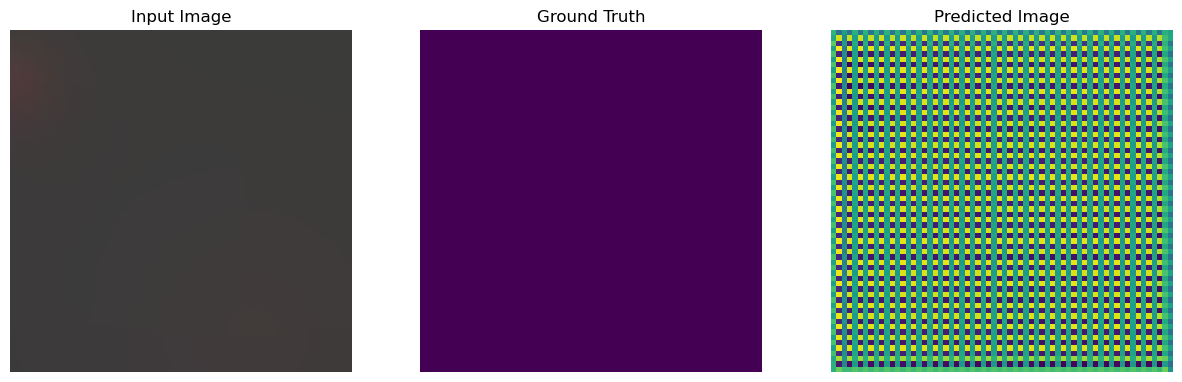

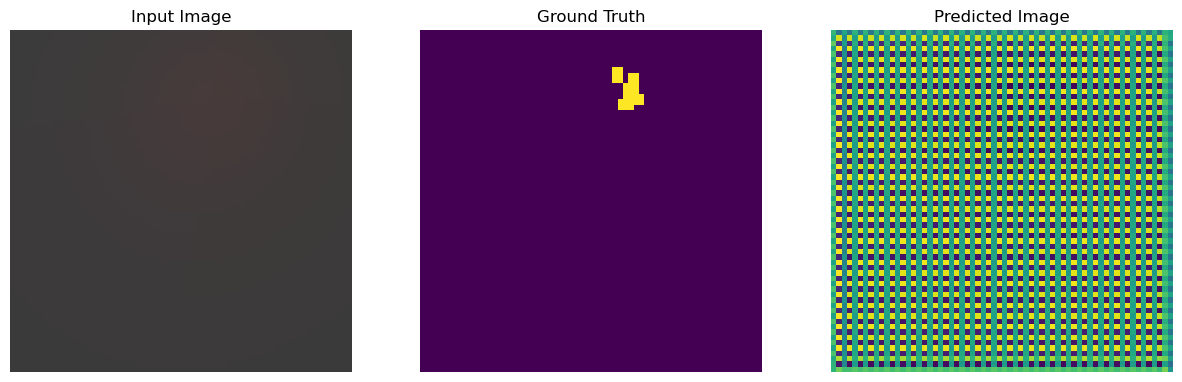

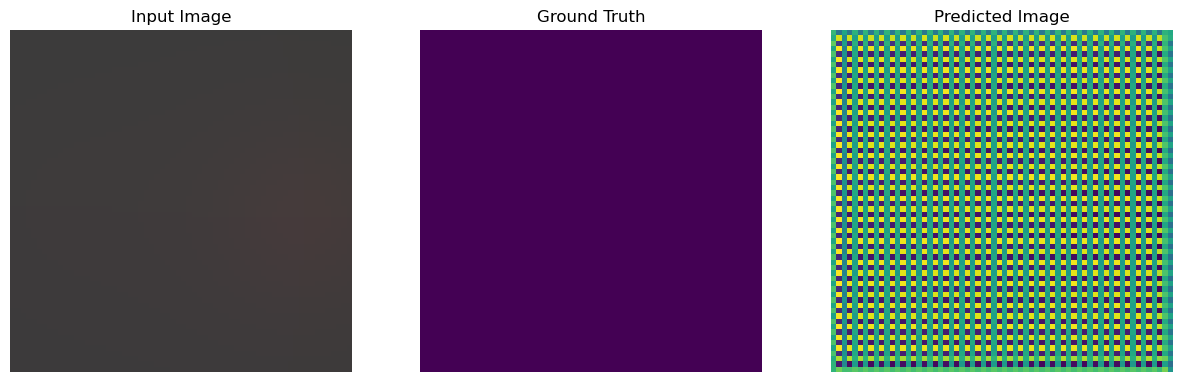

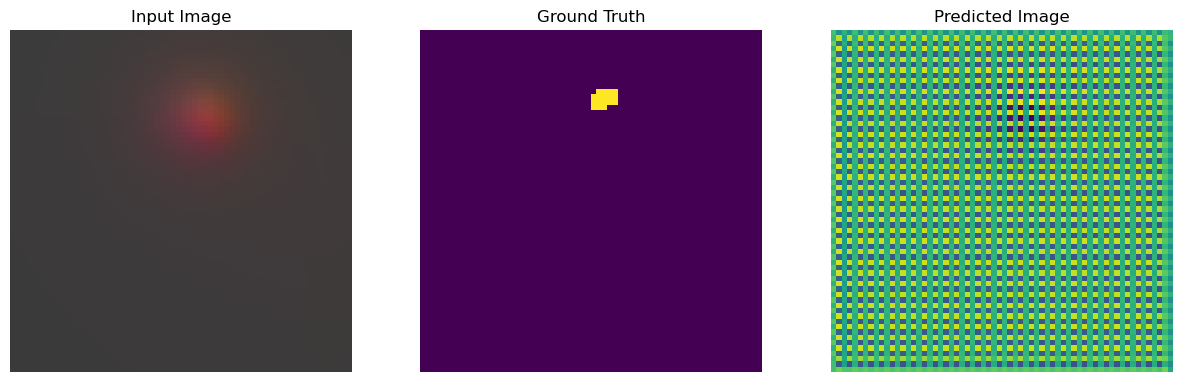

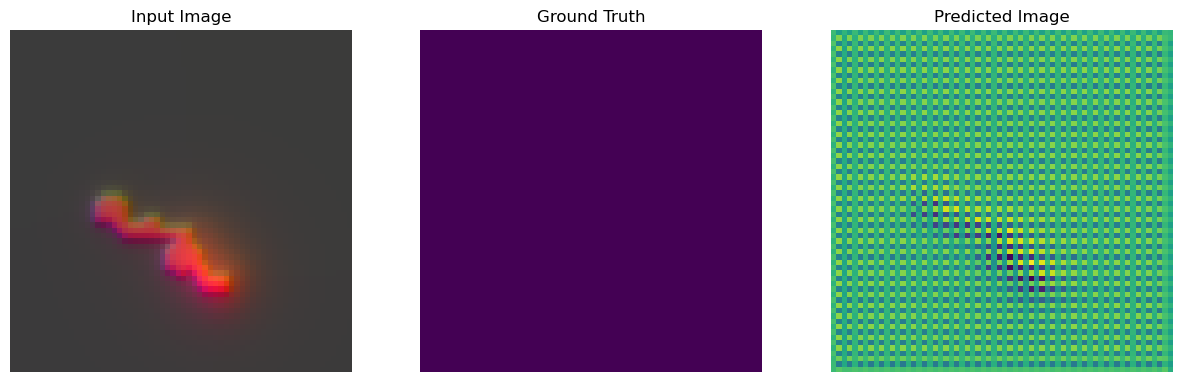

In [12]:
idx = 100
for inp, tar in test_dataset.take(5):
    prediction = generator(inp, training=False)
    plt.figure(figsize=(15, 15))

    display_list = [inp[0], tar[0][:, :, 15], prediction[0][:, :, 15]]
    title = ['Input Image', 'Ground Truth', 'Predicted Image']

    for i in range(3):
        plt.subplot(1, 3, i+1)
        plt.title(title[i])
        # Getting the pixel values in the [0, 1] range to plot.
        plt.imshow(display_list[i])
        plt.axis('off')
    plt.show()